In [1]:
import numpy as np
import gudhi
import mdtraj as md
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
from math import pi
import MDAnalysis as mda
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)
import pandas as pd
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import spectral_clustering
import random
import gudhi.representations

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
traj6 = md.load('ahelix100frame.pdb')
traj6 = md.Trajectory.superpose(traj6, traj6[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [3]:
traj5 = md.load('normal100frame.pdb')
traj5 = md.Trajectory.superpose(traj5, traj5[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [4]:
carbon = traj5.topology.select("element == 'C'")

In [5]:
carbon_atoms = traj6.topology.select("element == 'C'")

In [6]:
num_frames = traj6.n_frames

In [7]:
traj6.n_frames

100

In [8]:
interval6 = []

for frame in range(traj6.n_frames):
    carbon_coordinates6 = traj6.xyz[frame, carbon_atoms, :]
    rips_complex6 = gudhi.RipsComplex(points = carbon_coordinates6)
    simplex_tree6 = rips_complex6.create_simplex_tree(max_dimension=3)
    persistence6 = simplex_tree6.persistence()
    interval6.append(simplex_tree6.persistence_intervals_in_dimension(1))

In [9]:
interval5 = []

for frame in range(traj5.n_frames):
    carbon_coordinates5 = traj5.xyz[frame, carbon, :]
    rips_complex5 = gudhi.RipsComplex(points = carbon_coordinates5)
    simplex_tree5 = rips_complex5.create_simplex_tree(max_dimension=3)
    persistence5 = simplex_tree5.persistence()
    interval5.append(simplex_tree5.persistence_intervals_in_dimension(1))

In [10]:
LS6 = gudhi.representations.Landscape(resolution=10000,sample_range = [0.3,0.6])
L6 = LS6.fit_transform(interval6)

In [11]:
LS5 = gudhi.representations.Landscape(resolution=10000,sample_range = [0.3,0.6])
L5 = LS5.fit_transform(interval5)

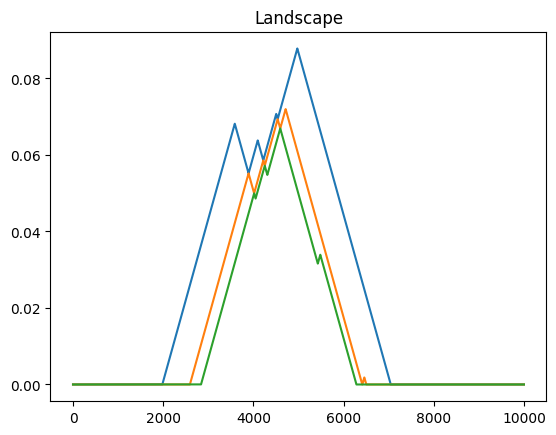

In [12]:
plt.plot(L6[6][:10000])
plt.plot(L6[6][10000:20000])
plt.plot(L6[6][20000:30000])
plt.title("Landscape")
plt.show()

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

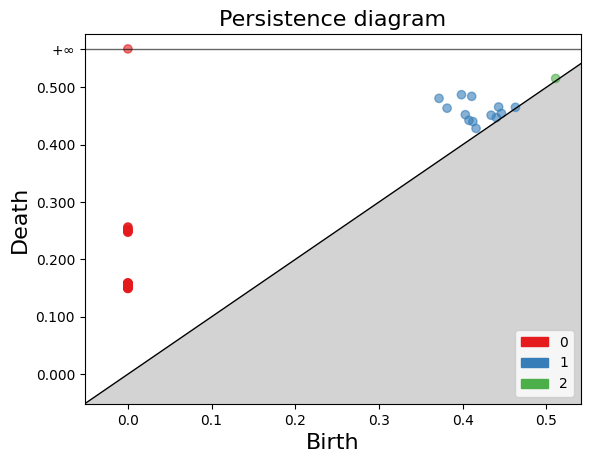

In [13]:
gudhi.plot_persistence_diagram(persistence6)

In [14]:
# Transpose the list of lists to get lists of corresponding elements
transposed_lists5 = zip(*L5)

# Calculate the average for each sublist of corresponding elements
averages5 = [sum(sublist) / len(sublist) for sublist in transposed_lists5]

# The 'averages' list now contains the average for each corresponding element


In [15]:
# Transpose the list of lists to get lists of corresponding elements
transposed_lists6 = zip(*L6)

# Calculate the average for each sublist of corresponding elements
averages6 = [sum(sublist) / len(sublist) for sublist in transposed_lists6]

# The 'averages' list now contains the average for each corresponding element


In [16]:
print(len(averages6))

50000


In [17]:
len(interval6)

100

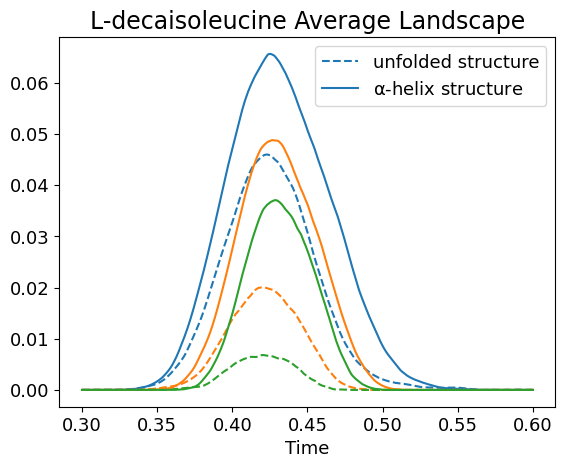

In [20]:
plt.plot(np.linspace(0.3,0.6,10000),averages5[:10000],linestyle='--' ,label='unfolded structure',color='tab:blue')
plt.plot(np.linspace(0.3,0.6,10000),averages5[10000:20000],linestyle='--',color='tab:orange')
plt.plot(np.linspace(0.3,0.6,10000),averages5[20000:30000],linestyle='--',color='tab:green')
plt.plot(np.linspace(0.3,0.6,10000),averages6[:10000],label=r'$\mathrm{\alpha}$-helix structure',color='tab:blue')
plt.plot(np.linspace(0.3,0.6,10000),averages6[10000:20000],color='tab:orange')
plt.plot(np.linspace(0.3,0.6,10000),averages6[20000:30000],color='tab:green')
plt.legend(fontsize=13)
plt.title("L-decaisoleucine Average Landscape", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Time', fontsize=13)
plt.savefig('6line L-deca Average Landscape', dpi=300)
plt.show()

plt.plot(np.linspace(0.3,0.6,10000),averages[:10000])
plt.plot(np.linspace(0.3,0.6,10000),averages[10000:20000])
plt.plot(np.linspace(0.3,0.6,10000),averages[20000:30000])
plt.title("D-alpha helix Average Landscape")
plt.savefig('ahelix Average Landscape', dpi=300)
plt.show()